In [1]:
from initial_plots import read_dataset
import numpy as np
from whole_pipeline import *
from utils_torch import *
import torch

device:  cuda


In [3]:
df = read_dataset(gt=False)

X = np.array(df)
X = X.reshape((610,340, 103))

df = read_dataset(gt=True)
y = np.array(df)

factor = 21
rows_factor = factor
cols_factor = factor

#insert rows_overlap = -1 or cols_overlapp = -1 to avoid overlapping
rows_overlap=21
cols_overlap=21

"""
    cols overlap represents how many cols we precede before starting a new patch
    for example for a 1x9 grid with 1X3 patches and cols_overlap = 2:
    (1 2 [3) 4 (5] 6 [7) 8 9]
    similar to rows overlap

    idealy, to prevent data loss overlap should be 1
"""

'\n    cols overlap represents how many cols we precede before starting a new patch\n    for example for a 1x9 grid with 1X3 patches and cols_overlap = 2:\n    (1 2 [3) 4 (5] 6 [7) 8 9]\n    similar to rows overlap\n\n    idealy, to prevent data loss overlap should be 1\n'

In [4]:
from utils_torch import validate_patches_generation
patches_sizes, validation_accs = validate_patches_generation(torch.from_numpy(X), torch.from_numpy(y), is_normalize_each_band=True, overlap_distance=factor, n_neighbors=3, checks=5)

PREPARE TIME:  0.3320009708404541
HDE TIME:  0.5709564685821533
HDD TIME:  0.0027348995208740234
DICT CREATION, THROW 0 LABELS, SPLIT TETS TRAIN TIME:  0.00047516822814941406
patch_to_points_dict:  {0: (42, 64, 126, 148), 1: (63, 85, 42, 64), 2: (84, 106, 42, 64), 3: (84, 106, 63, 85), 4: (84, 106, 147, 169), 5: (105, 127, 42, 64), 6: (105, 127, 84, 106), 7: (126, 148, 42, 64), 8: (126, 148, 63, 85), 9: (126, 148, 168, 190), 10: (147, 169, 21, 43), 11: (168, 190, 42, 64), 12: (168, 190, 63, 85), 13: (168, 190, 84, 106), 14: (168, 190, 126, 148), 15: (189, 211, 21, 43), 16: (189, 211, 126, 148), 17: (189, 211, 231, 253), 18: (189, 211, 252, 274), 19: (210, 232, 105, 127), 20: (252, 274, 63, 85), 21: (252, 274, 126, 148), 22: (252, 274, 168, 190), 23: (273, 295, 42, 64), 24: (294, 316, 105, 127), 25: (294, 316, 189, 211), 26: (294, 316, 210, 232), 27: (315, 337, 21, 43), 28: (315, 337, 189, 211), 29: (315, 337, 210, 232), 30: (336, 358, 21, 43), 31: (336, 358, 126, 148), 32: (336, 358, 1

In [12]:
import matplotlib.pyplot as plt
plt.plot(patches_sizes, validation_accs)
plt.title('Validation of Patches Size with Center Labeling')
plt.xlabel('Patches Size')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.savefig("validation_patches_size.png")

In [ ]:
patches_sizes, validation_accs = validate_patches_generation(torch.from_numpy(X), torch.from_numpy(y), 'most_common', is_normalize_each_band=True, overlap_distance=factor, n_neighbors=3, checks=5)

PREPARE TIME:  1.0504462718963623
HDE TIME:  0.29398488998413086
HDD TIME:  0.23742961883544922
DICT CREATION, THROW 0 LABELS, SPLIT TETS TRAIN TIME:  0.0016701221466064453
patch_to_points_dict:  {0: (42, 64, 126, 148), 1: (63, 85, 42, 64), 2: (84, 106, 42, 64), 3: (84, 106, 63, 85), 4: (84, 106, 147, 169), 5: (105, 127, 42, 64), 6: (105, 127, 84, 106), 7: (126, 148, 42, 64), 8: (126, 148, 63, 85), 9: (126, 148, 168, 190), 10: (147, 169, 21, 43), 11: (168, 190, 42, 64), 12: (168, 190, 63, 85), 13: (168, 190, 84, 106), 14: (168, 190, 126, 148), 15: (189, 211, 21, 43), 16: (189, 211, 126, 148), 17: (189, 211, 231, 253), 18: (189, 211, 252, 274), 19: (210, 232, 105, 127), 20: (252, 274, 63, 85), 21: (252, 274, 126, 148), 22: (252, 274, 168, 190), 23: (273, 295, 42, 64), 24: (294, 316, 105, 127), 25: (294, 316, 189, 211), 26: (294, 316, 210, 232), 27: (315, 337, 21, 43), 28: (315, 337, 189, 211), 29: (315, 337, 210, 232), 30: (336, 358, 21, 43), 31: (336, 358, 126, 148), 32: (336, 358, 189

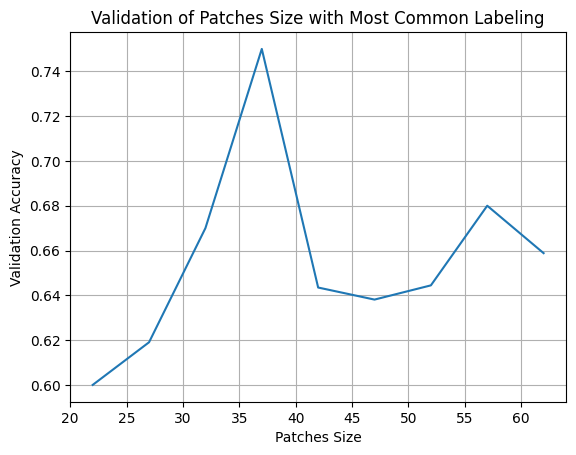

In [ ]:
import matplotlib.pyplot as plt
plt.plot(patches_sizes, validation_accs)
plt.title('Validation of Patches Size with Most Common Labeling')
plt.xlabel('Patches Size')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# old version- using whole X as data
# whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='center')

In [ ]:
# old version- using whole X as data
whole_pipeline_all_torch(torch.from_numpy(X),torch.from_numpy(y), rows_factor, cols_factor, rows_overlap, cols_overlap, is_normalize_each_band=True, method_label_patch='center')

XXXXXXX IN METHOD XXXXXXXXX
PREPARE TIME:  1.0241162776947021
HDE TIME:  0.3664822578430176
HDD TIME:  0.31588125228881836
WHOLE METHOD TIME:  1.706479787826538
XXXXXXX IN CLASSIFICATION XXXXXXXXX
DICT CREATION, THROW 0 LABELS, SPLIT TETS TRAIN TIME:  0.0023763179779052734
patch_to_points_dict:  {0: (21, 42, 105, 126), 1: (42, 63, 21, 42), 2: (63, 84, 21, 42), 3: (63, 84, 42, 63), 4: (63, 84, 126, 147), 5: (84, 105, 21, 42), 6: (84, 105, 63, 84), 7: (84, 105, 84, 105), 8: (105, 126, 21, 42), 9: (105, 126, 42, 63), 10: (105, 126, 147, 168), 11: (126, 147, 0, 21), 12: (147, 168, 21, 42), 13: (147, 168, 42, 63), 14: (147, 168, 63, 84), 15: (147, 168, 105, 126), 16: (168, 189, 0, 21), 17: (168, 189, 105, 126), 18: (168, 189, 210, 231), 19: (189, 210, 84, 105), 20: (189, 210, 189, 210), 21: (231, 252, 42, 63), 22: (231, 252, 105, 126), 23: (231, 252, 147, 168), 24: (231, 252, 168, 189), 25: (273, 294, 84, 105), 26: (273, 294, 168, 189), 27: (273, 294, 189, 210), 28: (294, 315, 168, 189), 29

In [ ]:
# new version- dividing X to spectral bands
#whole_pipeline_divided(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='center')



In [ ]:
# new version- dividing X to spectral bands
whole_pipeline_divided_torch(torch.from_numpy(X),torch.from_numpy(y), rows_factor, cols_factor, rows_overlap, cols_overlap, is_normalize_each_band=True, method_label_patch='center')



tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [ ]:
# #A test for overlapping patches:

# import torch
# from utils_torch import *

# def print_tensor(tensor):
#     for row in tensor:
#         print(' '.join([str(elem.item()).rjust(4) for elem in row]))

# rows = 5
# cols = 5
# data = torch.randint(0, 100, (rows, cols, 1), dtype=torch.int32)
# labels = torch.randint(0, 3, (rows, cols), dtype=torch.int32)
# print_tensor(labels)


# factor = 5
# overlap = 2
# patched_data, patched_labels, labels = patch_data_overlap_torch(data, labels, factor, factor, overlap, overlap, method_label_patch="center")

# print(patched_labels)


In [ ]:
# #A test for overlapping patches:

# import torch
# from utils_torch import *
# from classification import patch_to_points, point_to_patches, split_train_test

# def print_tensor(tensor):
#     for row in tensor:
#         print(' '.join([str(elem.item()).rjust(4) for elem in row]))

# rows = 3
# cols = 3
# data = torch.randint(0, 100, (rows, cols, 1), dtype=torch.int32)
# labels = torch.randint(0, 3, (rows, cols), dtype=torch.int32)
# print_tensor(labels)


# factor = 2
# overlap = 1
# patched_data, patched_labels, labels = patch_data_overlap_torch(data, labels, factor, factor, overlap, overlap)

# print("-----------------------")
# print_tensor(patched_labels)

# print("-----------------------")
# dictionary = (patch_to_points(patched_labels.flatten(), factor, factor, overlap, overlap, num_patches_in_row=patched_labels.shape[1]))
# print(dictionary)

# print("-----------------------")
# dictionary = point_to_patches(dictionary)
# print(dictionary)

# print("-----------------------")
# print(split_train_test(dictionary, patched_labels.flatten())[1])

# print("-----------------------")
# print(split_train_test(dictionary, patched_labels.flatten())[3])



In [ ]:
import torch

def remove_zeroes(tensor):
    non_zero_indices = tensor.nonzero()
    if non_zero_indices.numel() == 0:
        return tensor
    print(non_zero_indices)
    return tensor[non_zero_indices[:, 0], non_zero_indices[:, 1]]

# Create a tensor filled with integers from 0 to 2
tensor = torch.randint(0, 3, (4, 4))

print("Original Tensor:")
print(tensor)

# Remove zeroes from the tensor
tensor_without_zeroes = remove_zeroes(tensor)

print("\nTensor without Zeroes:")
print(tensor_without_zeroes)


Original Tensor:
tensor([[0, 2, 0, 2],
        [2, 0, 1, 0],
        [2, 1, 1, 0],
        [0, 1, 0, 0]])
tensor([[0, 1],
        [0, 3],
        [1, 0],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2],
        [3, 1]])

Tensor without Zeroes:
tensor([2, 2, 2, 1, 2, 1, 1, 1])
